In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
%matplotlib inline
cf.go_offline()

In [2]:
data = "Resources/ChurchofJesusChristTemples.csv"

In [3]:
# Read our data file with the pandas library
temple_data = pd.read_csv(data)

In [4]:
# Show just header
temple_data.head()

,Temple,Latitude,Longitude,LatitudeDegrees,LongitudeDegress,Address,City,State,Postal Code,Country,Phone
0,Aba Nigeria Temple,5.147644,7.356719,"5°8'51""N","7°21'24""E",Okpu-Umuoba Road Off Aba-Owerri Road at Union ...,Aba,Abia State,NaN,Nigeria,(+234) 80-3903-4804
1,Abidjan Côte d'Ivoire Temple,5.362307,-3.976865,"5°21'44""N","3°58'36""W",NaN,Abidjan,NaN,NaN,Cote d'Ivoire,NaN
2,Accra Ghana Temple,5.567490,-0.193706,"5°34'2""N","-0°11'37""E",57 Independence Avenue North Ridge PMB CT 209 ...,Accra,NaN,NaN,Ghana,(+233) 302-650-123
3,Adelaide Australia Temple,-34.892473,138.635002,"34°53'32""S","138°38'6""E",53-59 Lower Portrush Road,Marden,South Australia,5070,Australia,(+61) 8-8363-8000
4,Alabang Philippines Temple,14.412913,121.037838,"14°24'46""N","121°2'16""E",Filinvest Avenue and Corporate Avenue Alabang,Muntinlupa,Metro Manila,NaN,Philippines,NaN


In [8]:
# Number of Rows & Columns
temple_data.shape

(214, 11)

In [6]:
temple_data['Temple'].nunique()

214

In [9]:
# Get the names of the columns
temple_data.columns

Index(['Temple', 'Latitude', 'Longitude', 'LatitudeDegrees',
       'LongitudeDegress', 'Address', 'City', 'State', 'Postal Code',
       'Country', 'Phone'],
      dtype='object')

In [10]:
# Number of temple records we have 
temple_data.Temple.count()

214

In [11]:
# How many missing values do we have
temple_data.isnull().sum()

Temple               0
Latitude             0
Longitude            0
LatitudeDegrees      0
LongitudeDegress     0
Address              9
City                 0
State               41
Postal Code         63
Country              0
Phone               47
dtype: int64

In [12]:
# Drop the columns we are not using 
temple_data.drop(['Address', 'Postal Code', 'Phone'], axis=1)

,Temple,Latitude,Longitude,LatitudeDegrees,LongitudeDegress,City,State,Country
0,Aba Nigeria Temple,5.147644,7.356719,"5°8'51""N","7°21'24""E",Aba,Abia State,Nigeria
1,Abidjan Côte d'Ivoire Temple,5.362307,-3.976865,"5°21'44""N","3°58'36""W",Abidjan,NaN,Cote d'Ivoire
2,Accra Ghana Temple,5.567490,-0.193706,"5°34'2""N","-0°11'37""E",Accra,NaN,Ghana
3,Adelaide Australia Temple,-34.892473,138.635002,"34°53'32""S","138°38'6""E",Marden,South Australia,Australia
4,Alabang Philippines Temple,14.412913,121.037838,"14°24'46""N","121°2'16""E",Muntinlupa,Metro Manila,Philippines
...,...,...,...,...,...,...,...,...
209,Villahermosa Mexico Temple,17.981276,-92.937375,"17°58'52""N","92°56'14""W",Villahermosa,Tabasco,Mexico
210,Washington D.C. Temple,39.014079,-77.065624,"39°0'50""N","77°3'56""W",Kensington,Maryland,United States
211,Winnipeg Manitoba Temple,49.800544,-97.195212,"49°48'1""N","97°11'42""W",Winnipeg,Manitoba,Canada
212,Winter Quarters Nebraska Temple,41.334075,-95.966190,"41°20'2""N","95°57'58""W",Omaha,Nebraska,United States


In [13]:
# Group the temples by country 
temples_by_country = temple_data.groupby(['Country'])

In [14]:
# How many temples in each country 
temple_count = temples_by_country.Temple.count().to_frame().reset_index()

In [15]:
data = dict(type='choropleth',
           locations = temple_count['Country'],
           locationmode = 'country names', 
            z= temple_count['Temple'],
            colorbar = {'title': 'No. of temples'},
            colorscale = 'emrld_r',
            reversescale = True
            )

In [16]:
layout = dict(
    title = 'LDS Temples',
    geo = dict(
        showframe = True,
        projection = {'type':'natural earth'}
    )
)

In [17]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap, validate=False)

In [18]:
# What are the top two countries 
temples_by_country.Temple.count().nlargest(5)

Country
United States    96
Mexico           14
Brazil           11
Canada            9
Argentina         5
Name: Temple, dtype: int64

In [20]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK',
    'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN','Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY','Louisiana': 'LA',
    'Maine': 'ME','Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS','Missouri': 'MO',
    'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH', 'Oklahoma': 'OK','Oregon': 'OR',
    'Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI', 'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI','Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

In [37]:
united_states = temple_data.loc[temple_data['Country'] == "Japan"].reset_index()
united_states.drop(['index', 'Address', 'Postal Code', 'Phone'], axis=1)

,Temple,Latitude,Longitude,LatitudeDegrees,LongitudeDegress,City,State,Country
0,Fukuoka Japan Temple,33.572618,130.391704,"33°34'21""N","130°23'30""E",Fukuoka-shi,Fukuoka-ken,Japan
1,Okinawa Japan Temple,26.358285,127.801718,"26°21'29""N","127°48'6""E",Okinawa Shi,Okinawa-ken,Japan
2,Sapporo Japan Temple,43.024900,141.445700,"43°1'29""N","141°26'44""E",Sapporo,Hokkaid?,Japan
3,Tokyo Japan Temple,35.652838,139.724539,"35°39'10""N","139°43'28""E",Tokyo,NaN,Japan


In [22]:
temples_by_state = united_states.groupby(['State'])

In [23]:
temple_count_state = temples_by_state.Temple.count().to_frame().reset_index()

In [24]:
temple_count_state['Abbrev'] = temple_count_state['State'].map(us_state_abbrev)

In [25]:
temple_count_state.head()

,State,Temple,Abbrev
0,Alabama,1,AL
1,Alaska,1,AK
2,Arizona,6,AZ
3,Arkansas,1,AR
4,California,8,CA


In [26]:
data = dict(type = 'choropleth',
            locations = temple_count_state['Abbrev'],
            locationmode = 'USA-states',
            colorscale= 'emrld',
            z=temple_count_state['Temple'],
            colorbar = {'title':'Temple Count'})

In [27]:
layout = dict(geo = {'scope':'usa'})

In [28]:
choromap = go.Figure(data = [data],layout = layout)

In [30]:
iplot(choromap)

In [137]:
temple_count

,Country,Temple
0,American Samoa,1
1,Argentina,5
2,Australia,5
3,Bolivia,1
4,Brazil,11
5,Cambodia,1
6,Canada,9
7,Cape Verde,1
8,Chile,3
9,Colombia,2


In [127]:
temple_count.columns

Index(['Country', 'Temple'], dtype='object')

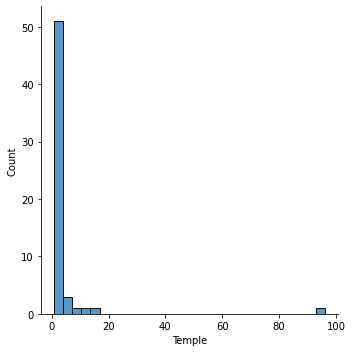

In [138]:
sns.displot(temple_count['Temple'], bins=30)